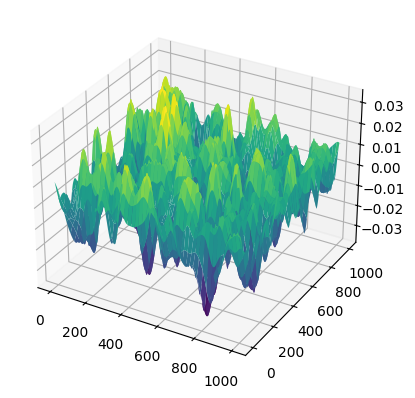

In [1]:
import numpy as np
import matplotlib.pyplot as plt

N = [1000, 1000]  # size in pixels of the image
F = 3         # frequency-filter width

X, Y = np.meshgrid(np.arange(1, N[0] + 1), np.arange(1, N[1] + 1))
i = np.minimum(X - 1, N[0] - X + 1)
j = np.minimum(Y - 1, N[1] - Y + 1)
H = np.exp(-0.1 * (i**2 + j**2) / F**2)

# Generating random field and applying the filter in frequency domain
Z = np.fft.ifft2(H * np.fft.fft2(np.random.randn(*N))).real

# Plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z, edgecolor='none', cmap='viridis')
plt.show()


441667189


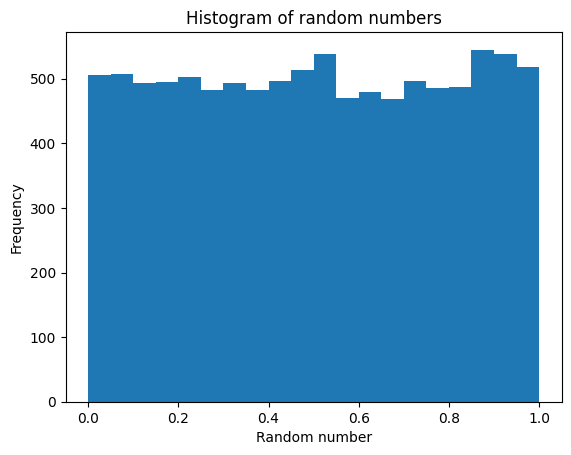

In [8]:
import numpy as np
import os

def lcg(modulus, a, c, seed):
    """Linear congruential generator."""
    while True:
        seed = (a * seed + c) % modulus
        yield seed / modulus

# Define the parameters for the LCG
modulus = 2**32
a = 1103515245
c = 12345


# Generate a random seed
seed = int.from_bytes(os.urandom(4), byteorder="big")

print(seed)

# Create an instance of the LCG
random_gen = lcg(modulus, a, c, seed)
plt.hist([next(random_gen) for _ in range(10000)], bins=20)
plt.xlabel('Random number')
plt.ylabel('Frequency')
plt.title('Histogram of random numbers')
plt.show()

8944674


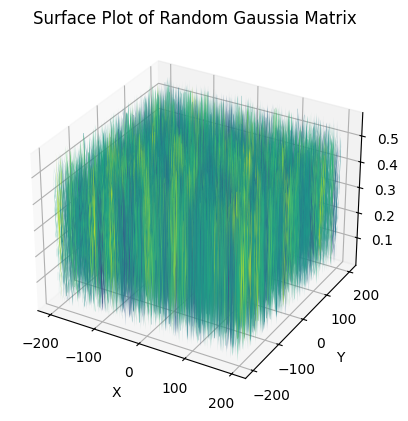

/home/abhishek/.local/lib/python3.10/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


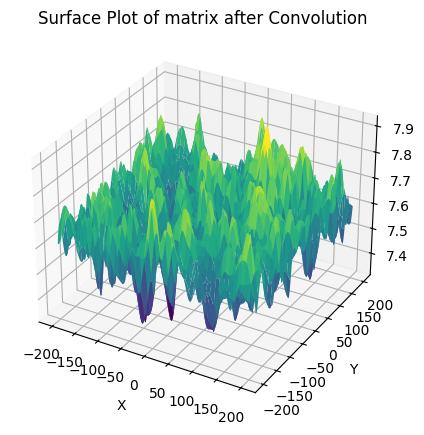

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import os
import time


# Create an instance of the LCG
random_gen = lcg(modulus, a, c, seed)

def scale_matrix(matrix):
    current_rms = np.sqrt(np.mean(matrix**2))
    scaled_matrix = matrix * current_rms
    return scaled_matrix

def gaussian_filter(x, y, cl):
    return np.exp(-(x**2 + y**2) / (0.5* cl**2))

def main():
    # Define the correlation length for the Gaussian filter
    cl = 15
    L= 200 #length
    
    # Define the size of the matrix (N) based on Nyquist criterion
    # Nyquist frequency is 1/(2 * delta), where delta is the grid spacing
    # We choose delta = cl/5 to ensure sufficient sampling
    N = 800 # Adjust grid spacing as needed
    
    # Create a grid of coordinates
    x = np.linspace(-L, L, N)
    y = np.linspace(-L, L, N)
    xx, yy = np.meshgrid(x, y)
    
    # Create a random 2D matrix of size N
    # random_matrix = np.random.rand(N, N)

    random_matrix = np.empty((N, N))

    for i in range(N):
        for j in range(N):
            random_matrix[i, j] = next(random_gen)

    # Define the desired RMS value
  
    
    # Scale the matrix
    scaled_matrix = scale_matrix(random_matrix)
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    surf = ax.plot_surface(xx, yy, scaled_matrix, cmap='viridis')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title('Surface Plot of Random Gaussia Matrix')
    plt.show()
    
    # Create the Gaussian filter
    gaussian = gaussian_filter(xx, yy, cl)
    
    # Convolve the scaled matrix with the Gaussian filter
    final_matrix = ((2*L)/(np.sqrt(np.pi)*N*cl))*np.fft.ifft2(np.fft.fft2(scaled_matrix) * np.fft.fft2(gaussian))

    # Plot the final matrix as a surface
    fig = plt.figure(figsize=(50, 5))
    ax = fig.add_subplot(111, projection='3d')
    surf = ax.plot_surface(xx, yy, final_matrix, cmap='viridis')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title('Surface Plot of matrix after Convolution')
    plt.show()

if __name__ == "__main__":
    main()


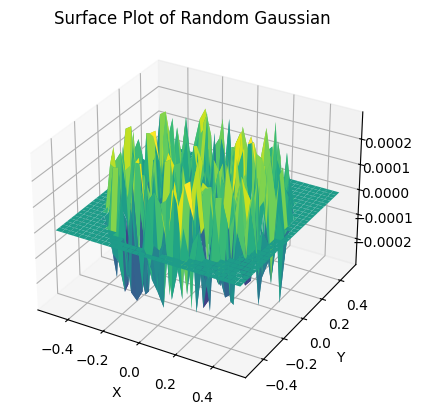

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the constants
C=0.65
n=32
N=100
# Create a grid in the x-y plane
x = np.linspace(-0.5, 0.5, n)  # 1x1 m² area divided into 1024 squares
y = np.linspace(-0.5, 0.5, n)
x, y = np.meshgrid(x, y)

# Initialize a 2D array to represent the z-coordinates
z0 = np.zeros_like(x)

# Define the radius of the circular rim
r = 0.437

# For each node on the grid
for i in range(n):
    for j in range(n):
        # If the node is outside the circular rim, set the z-value to zero
        if np.sqrt(x[i, j]**2 + y[i, j]**2) > r:
            z0[i, j] = 0
        else:
            # Generate random parameters
            A = C * np.random.uniform(-1, 1)
            std = 18.225 + 0.75 * np.random.uniform(0, 1)
            x0 = 10 * np.random.uniform(-1, 1)
            y0 = 10 * np.random.uniform(-1, 1)

            # Calculate the Gaussian function
            z0[i, j] += ((A / (2 * np.pi * std**2)) * np.exp(-((y[i, j] - y0)**2 + (x[i, j] - x0)**2) / (2 * std**2)))


fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z0, cmap='viridis')
ax.set_title('Surface Plot of superposition of Random Gaussian ')
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.show()

# Terrain Generation and Visualization

This Python script generates and visualizes a terrain with a crater. The terrain is represented as a 2D grid, and the crater is modeled as a spherical segment.

## Code Explanation

1. **Grid Size Definition**: The variable `N` is defined as the square root of the number of squares in the grid. This will be used to create the x and y coordinates of the grid.

    ```python
    N = 45 # square root of the number of squares
    ```

2. **Crater Parameters**: The radius `r` and depth `h` of the crater are defined. These values can be adjusted to create craters of different sizes and depths.

    ```python
    r = 0.437
    h = 0.313 # adjust this value to create different degrees of roughness
    ```

3. **Curvature Radius Calculation**: The curvature radius `R` of the spherical segment representing the crater is calculated using the formula `(r**2 + h**2) / (2*h)`.

    ```python
    R = (r**2 + h**2) / (2*h)
    ```

4. **Grid Creation**: A 2D grid with x and y coordinates ranging from -0.5 to 0.5 m is created using `numpy`'s `linspace` and `meshgrid` functions.

    ```python
    x, y = np.linspace(-0.5, 0.5, N), np.linspace(-0.5, 0.5, N)
    X, Y = np.meshgrid(x, y)
    ```

5. **Z-Coordinate Calculation**: The z-coordinate for each node in the grid is calculated. If the node is inside the crater (i.e., the distance from the node to the center of the crater is less than the radius of the crater), the z-coordinate is calculated using the formula `R - h - np.sqrt(R**2 - X**2 - Y**2)`. If the node is outside the crater, the z-coordinate is set to 0.

    ```python
    Z = np.where(X**2+Y**2 > r**2, 0, R -h-np.sqrt(R**2 - X**2 - Y**2))
    ```

6. **Terrain Visualization**: The terrain is visualized as a grayscale heatmap using `matplotlib`'s `imshow` function. The `cmap='gray'` parameter makes the image grayscale.

    ```python
    plt.imshow(Z, cmap='gray')
    plt.colorbar()
    plt.show()
    ```

This script can be used to generate and visualize terrains with craters of different sizes and depths. The size and depth of the crater can be adjusted by changing the values of `r` and `h`, respectively.

/tmp/ipykernel_26509/461201732.py:21: RuntimeWarning: invalid value encountered in sqrt
  Z = np.where(X**2+Y**2 > r**2, 0, R -h-np.sqrt(R**2 - X**2 - Y**2))


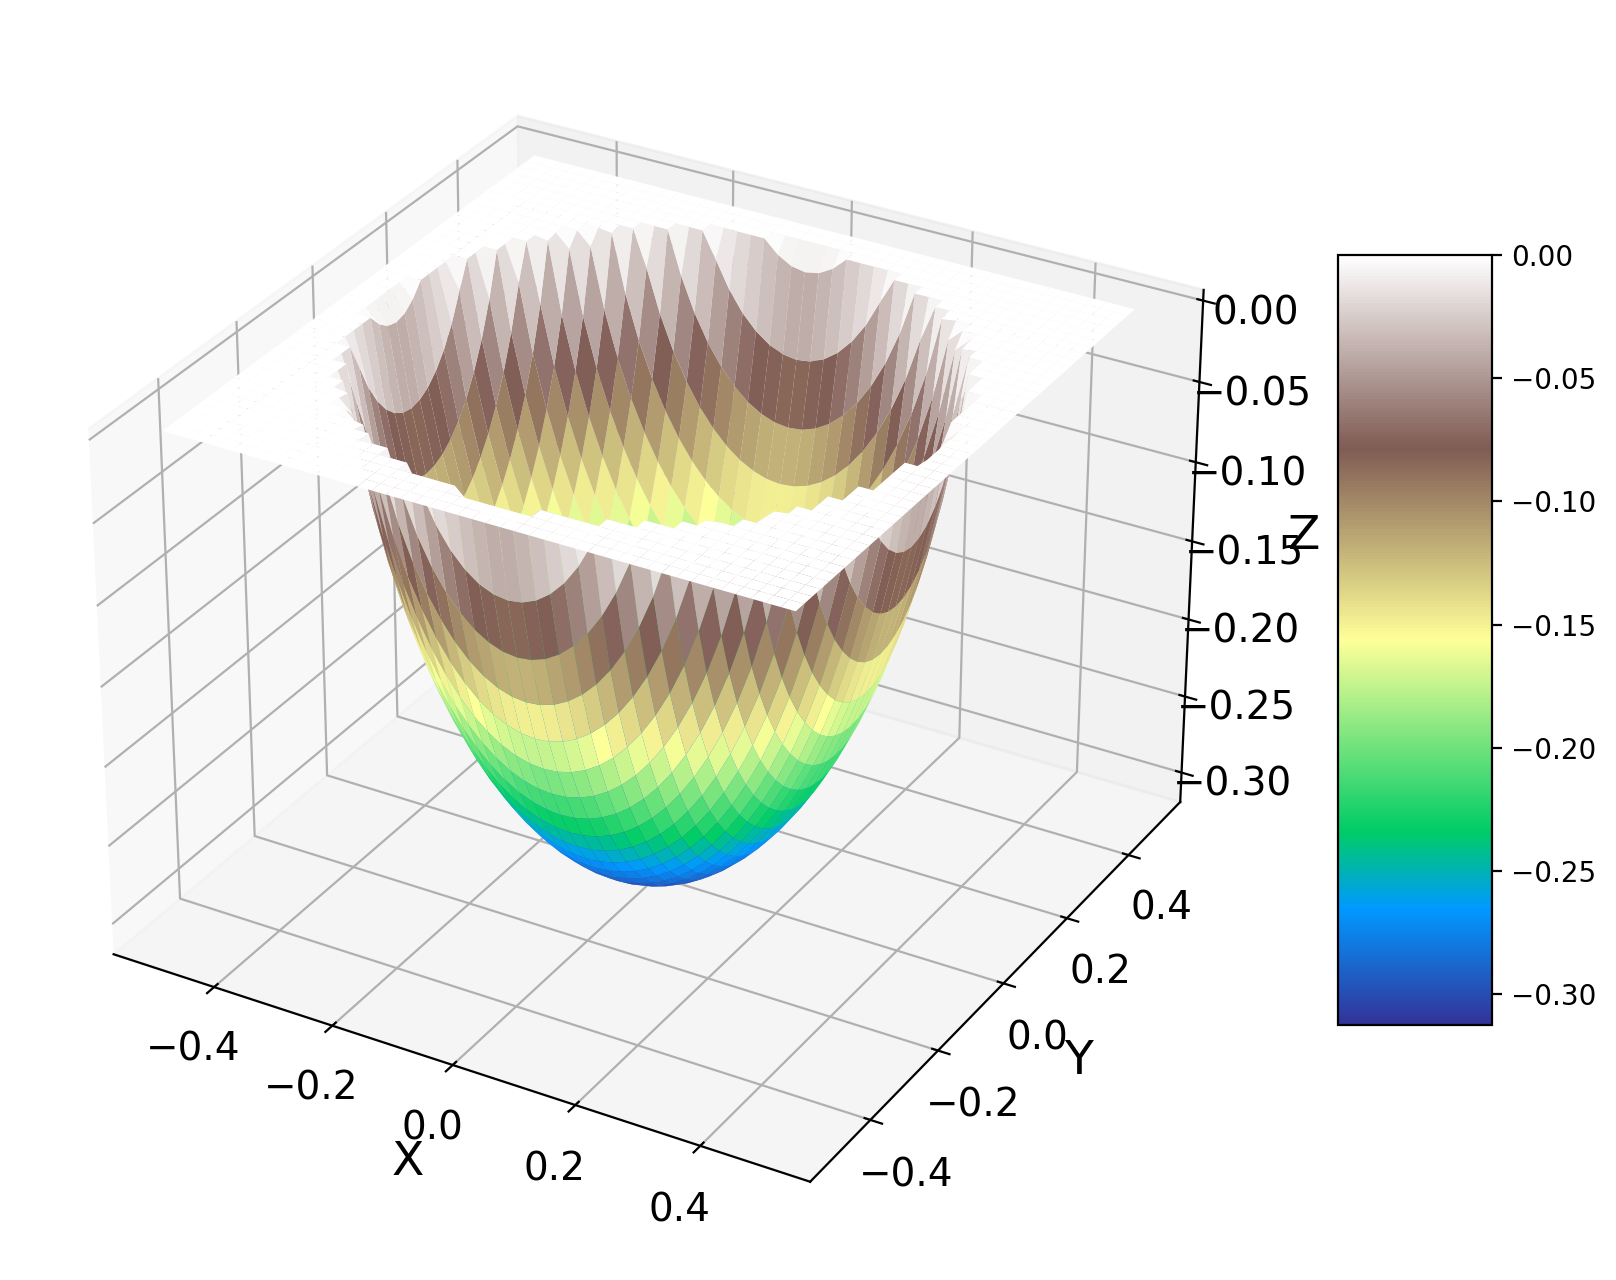

In [7]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Define the size of the grid
N = 45 # square root of the number of squares

# Define the radius and depth of the crater
r = 0.437
h = 0.313 # adjust this value to create different degrees of roughness

# Calculate the curvature radius of the spherical segment
R = (r**2 + h**2) / (2*h)

# Create a 2D grid with x and y coordinates ranging from -0.5 to 0.5 m
x, y = np.linspace(-0.5, 0.5, N), np.linspace(-0.5, 0.5, N)
X, Y = np.meshgrid(x, y)

# Calculate the z-coordinate for each node in the grid
# Z = np.where(X**2 + Y**2 > r**2, 0, R - np.sqrt(R**2 - X**2 - Y**2))
Z = np.where(X**2+Y**2 > r**2, 0, R -h-np.sqrt(R**2 - X**2 - Y**2))


# Plot the terrain


fig = plt.figure(figsize=(10,10),dpi=200)

ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('X', fontsize=17)
ax.set_ylabel('Y', fontsize=17)
ax.set_zlabel('Z', fontsize=17)

ax.tick_params(axis='both', which='major', labelsize=14)

surf= ax.plot_surface(X, Y, Z, cmap='terrain',rcount=N, ccount=N)
fig.colorbar(surf, shrink=0.5, aspect=5)


plt.show()

# Sinusoidal Trench Terrain Generation and Visualization

This Python script generates and visualizes a terrain with parallel sinusoidal trenches. The terrain is represented as a 2D grid, and the trenches are modeled as sinusoidal functions.

## Code Explanation

1. **Grid Size Definition**: The variable `N` is defined as the square root of the number of squares in the grid. This will be used to create the x and y coordinates of the grid.

    ```python
    N = 45 # square root of the number of squares
    ```

2. **Trench Parameters**: The number of trenches `N_trench` and the amplitude `C_t` are defined. These values can be adjusted to create different numbers and depths of trenches.

    ```python
    N_trench = 3
    C_t = 0.02438 # adjust this value to create different levels of roughness
    ```

3. **Grid Creation**: A 2D grid with x and y coordinates ranging from -0.5 to 0.5 m is created using `numpy`'s `linspace` and `meshgrid` functions.

    ```python
    x, y = np.linspace(-0.5, 0.5, N), np.linspace(-0.5, 0.5, N)
    X, Y = np.meshgrid(x, y)
    ```

4. **Z-Coordinate Calculation**: The z-coordinate for each node in the grid is calculated using the formula `C_t + C_t * np.sin(2 * np.pi * (N_trench + 0.5) * X)`. This creates parallel sinusoidal trenches running along the y-axis.

    ```python
    Z = C_t + C_t * np.sin(2 * np.pi * (N_trench + 0.5) * X)
    ```

5. **Terrain Visualization**: The terrain is visualized as a 3D surface plot using `matplotlib`'s `plot_surface` function. The `cmap='terrain'` parameter applies a terrain colormap to the surface.

    ```python
    fig = plt.figure(figsize=(10,10),dpi=200)
    ax = fig.add_subplot(111, projection='3d')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.plot_surface(X, Y, Z, cmap='terrain', rcount=N, ccount=N)
    plt.show()
    ```

This script can be used to generate and visualize terrains with parallel sinusoidal trenches of different numbers and depths. The number and depth of the trenches can be adjusted by changing the values of `N_trench` and `C_t`, respectively.

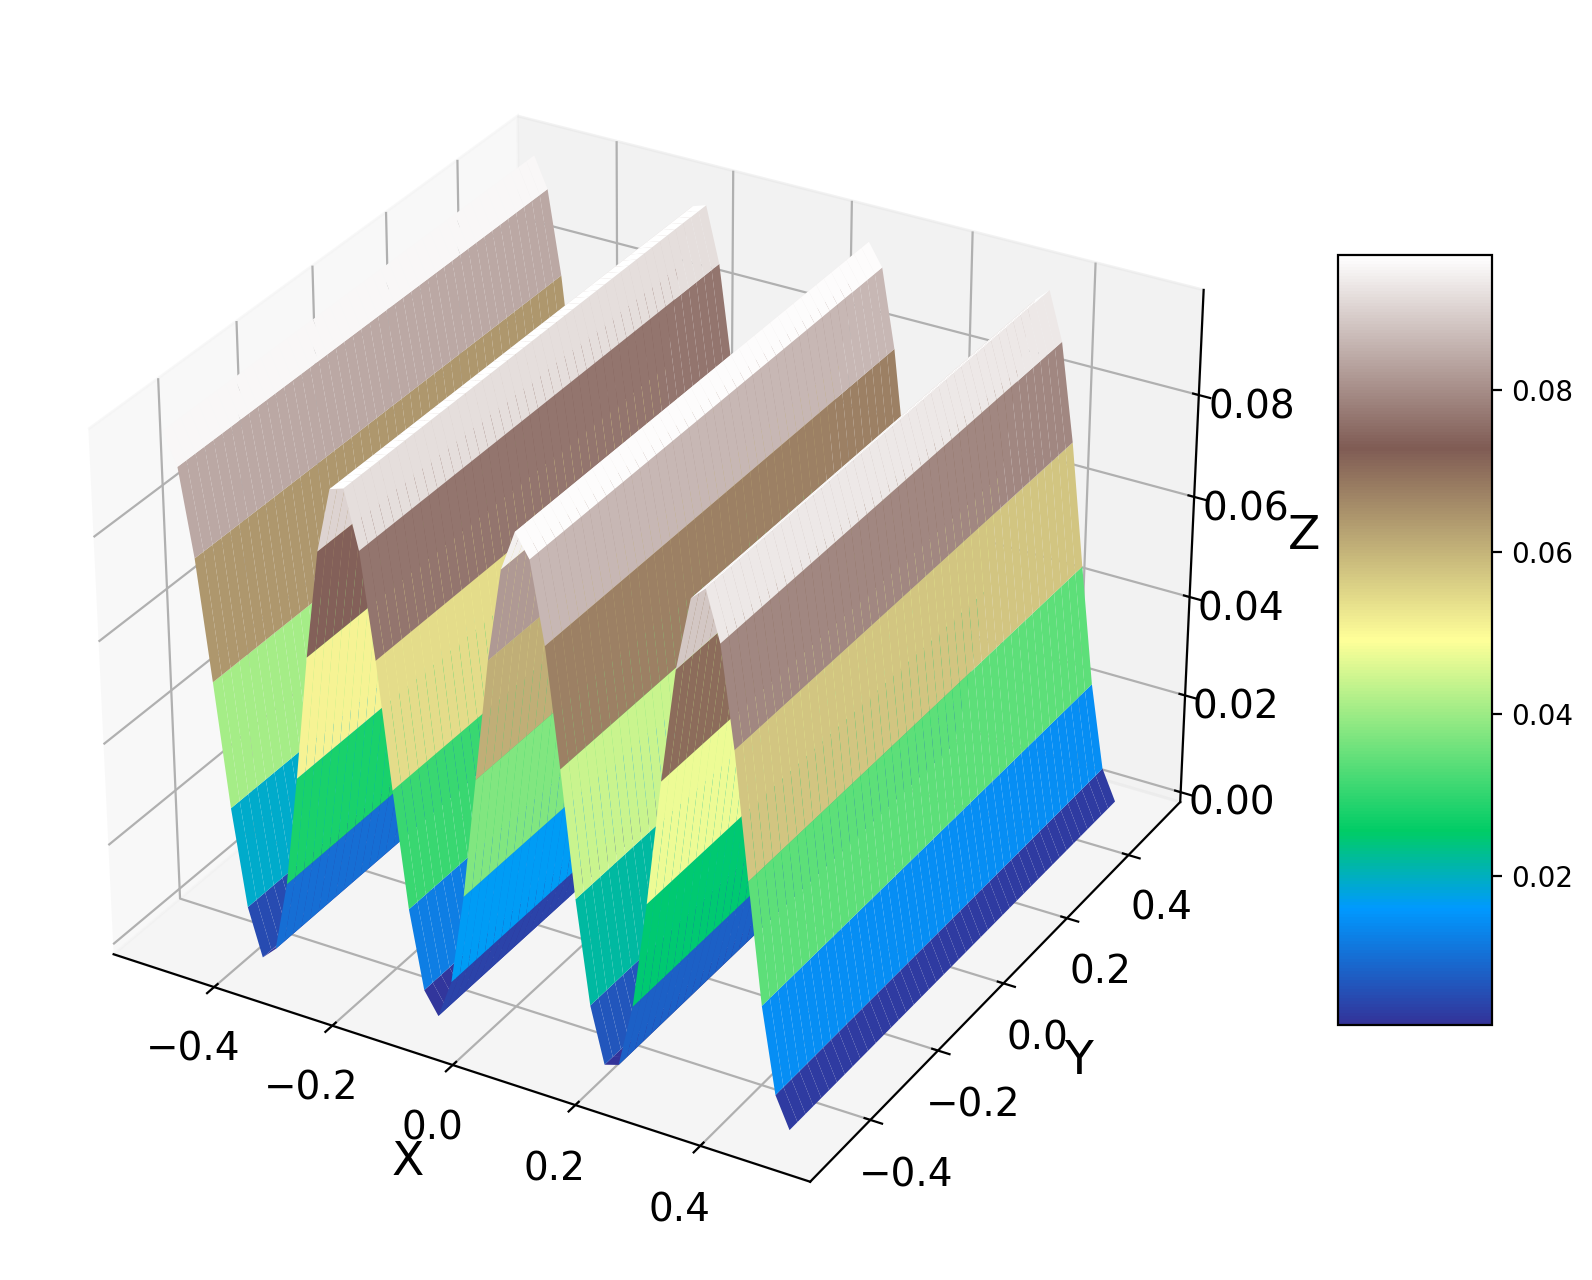

In [3]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Define the size of the grid
N = 45 # square root of the number of squares

# Define the number of trenches and the amplitude
N_trench = 3
C_t = 0.04912 # adjust this value to create different levels of roughness

# Create a 2D grid with x and y coordinates ranging from -0.5 to 0.5 m
x, y = np.linspace(-0.5, 0.5, N), np.linspace(-0.5, 0.5, N)
X, Y = np.meshgrid(x, y)

# Calculate the z-coordinate for each node in the grid
Z = C_t + C_t * np.sin(2 * np.pi * (N_trench + 0.5) * X)

# Plot the terrain
fig = plt.figure(figsize=(10,10),dpi=200)
ax = fig.add_subplot(111, projection='3d')

# Add axes names

ax.set_xlabel('X', fontsize=17)
ax.set_ylabel('Y', fontsize=17)
ax.set_zlabel('Z', fontsize=17)

ax.tick_params(axis='both', which='major', labelsize=14)

surf= ax.plot_surface(X, Y, Z, cmap='terrain',rcount=N, ccount=N)
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

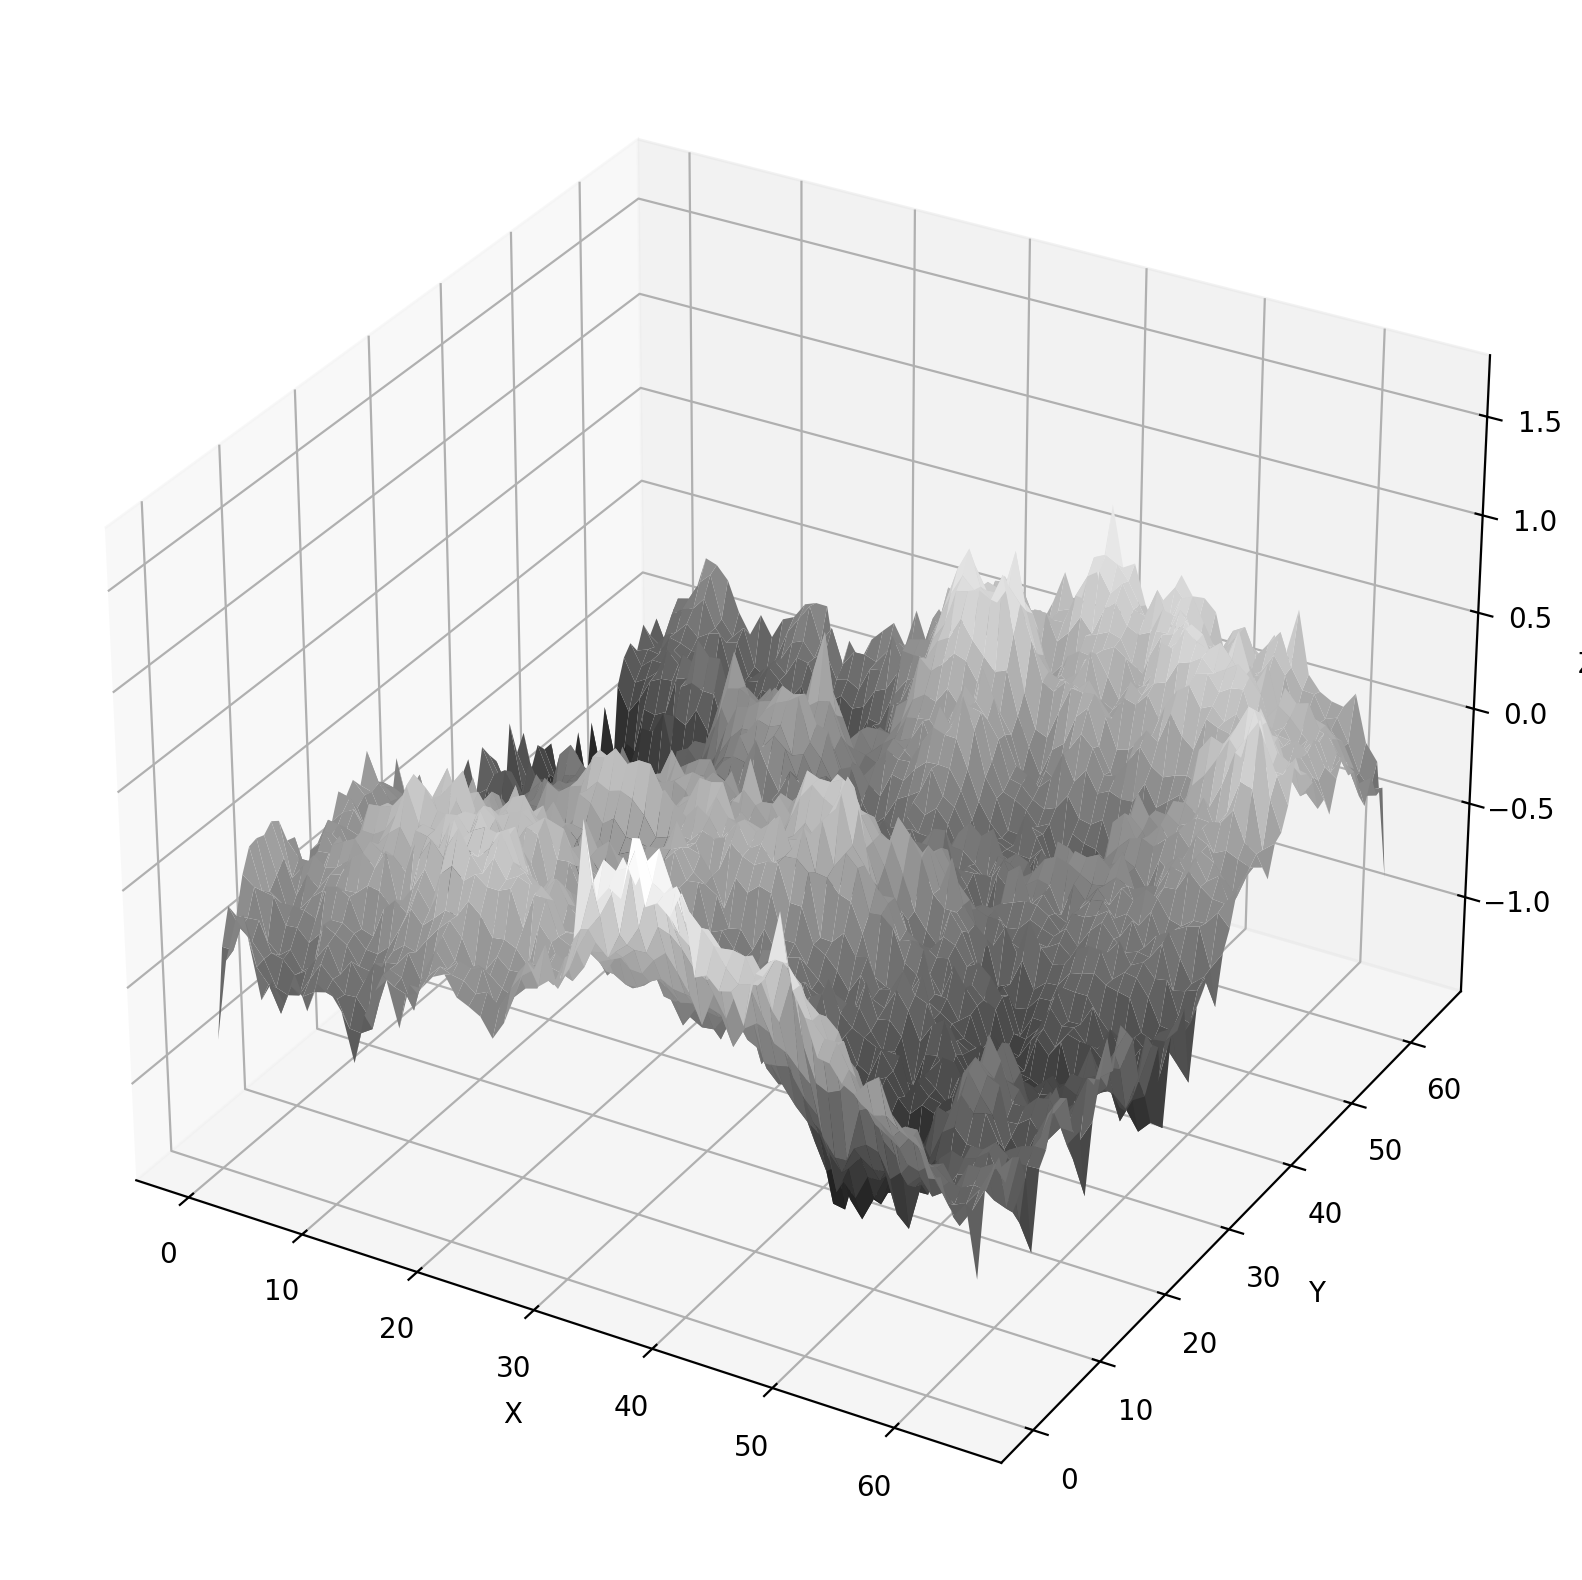

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def midpoint_displacement(n, H):
    # Create a 2D array with base height of zero
    terrain = np.zeros((n, n))

    # Initial corner values
    terrain[0, 0] = terrain[0, n-1] = terrain[n-1, 0] = terrain[n-1, n-1] = np.random.normal(0, 1)

    def displacement(half, scale):
        for y in range(half, n, half*2):
            for x in range(half, n, half*2):
                avg = sum(terrain[i, j] for i, j in [(y-half, x-half), (y-half, x+half), (y+half, x-half), (y+half, x+half)] if (0 <= i < n) and (0 <= j < n)) / 4.0
                terrain[y, x] = avg + np.random.normal(0, scale)

        for y in range(0, n, half):
            for x in range((y + half) % (half * 2), n, half * 2):
                avg = sum(terrain[i, j] for i, j in [(y-half, x), (y+half, x), (y, x-half), (y, x+half)] if (0 <= i < n) and (0 <= j < n)) / 4.0
                terrain[y, x] = avg + np.random.normal(0, scale)

    half = n // 2
    scale = 1
    while half:
        displacement(half, scale)
        half //= 2
        scale *= 2 ** (-H)

    return terrain

# Define the size of the grid
N = 2**6 + 1 # size of the grid, must be 2^n + 1

# Define the Hurst exponent
H = 0.8

# Generate the fractal terrain
terrain = midpoint_displacement(N, H)

# Plot the terrain
fig = plt.figure(figsize=(10,10),dpi=200)
ax = fig.add_subplot(111, projection='3d')
X, Y = np.meshgrid(np.arange(N), np.arange(N))
ax.plot_surface(X, Y, terrain, cmap='gray', rcount=N, ccount=N)



ax.set_zlim([np.min(terrain), np.max(terrain)*2])

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

25
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0


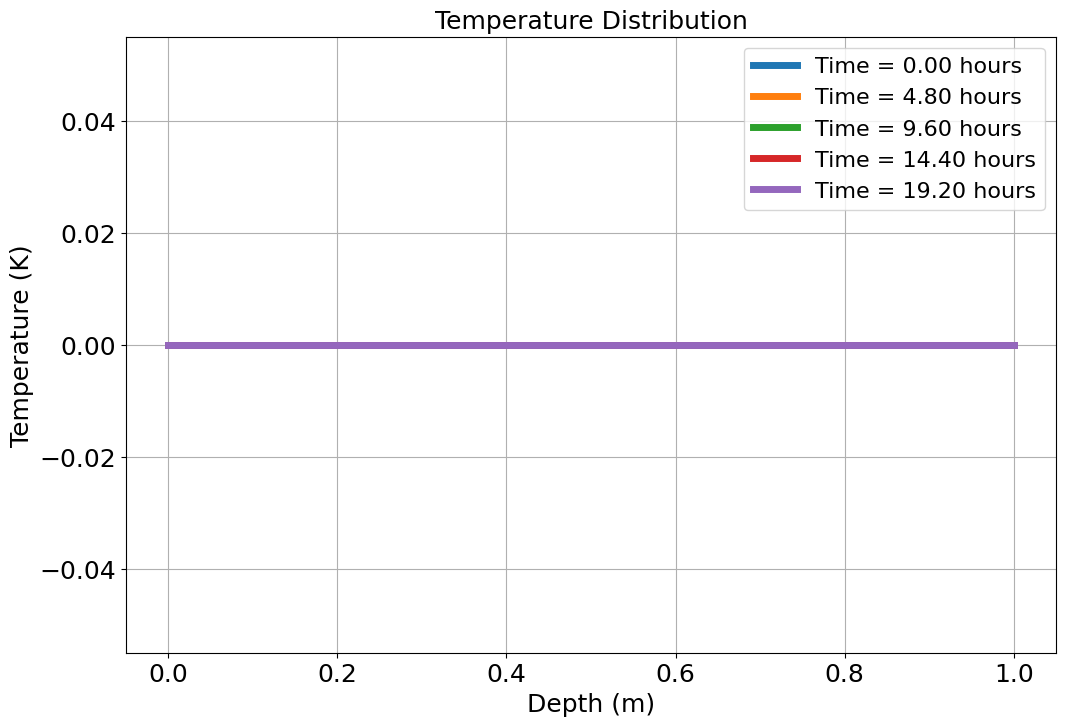

In [1]:
import numpy as np
import matplotlib.pyplot as plt


import numpy as np
import matplotlib.pyplot as plt

from scipy.interpolate import interp1d

# Given data points
x = [0, 0.9892051030421982, 2.001962708537782, 2.99116781157998, 4.003925417075564, 4.993130520117763, 6.005888125613346, 6.995093228655544, 7.984298331697743, 8.997055937193327, 9.939156035328754, 10.975466143277725, 11.964671246319922, 12.977428851815505, 13.99018645731109, 14.979391560353289, 15.992149165848872, 17.004906771344455, 17.994111874386654, 19.006869479882237, 19.972522080471048, 20.961727183513247, 21.998037291462218, 22.987242394504413, 24.023552502453388]
y = [101.57894736842104, 100.65789473684208, 98.81578947368422, 97.89473684210526, 96.9736842105263, 96.0526315789474, 132.89473684210526, 264.60526315789474, 317.56578947368416, 350.7236842105263, 373.2894736842105, 385.7236842105263, 392.17105263157896, 387.56578947368416, 374.2105263157895, 352.10526315789474, 319.4078947368421, 267.82894736842104, 163.75, 117.23684210526312, 112.63157894736844, 108.9473684210526, 105.7236842105263, 102.5, 101.57894736842104]
print(len(x))
# Create interpolation function
f = interp1d(x, y)

# Constants
alpha = 0.0199 # thermal diffusivity
L = 1  # thickness of the regolith
T0 = 350  # mean surface temperature
A = 50  # amplitude of surface temperature oscillations
P = 24.0  # period of surface temperature oscillations
Nx = 50# number of spatial points in the grid
Nt = 1500  # number of time steps
dx = L / (Nx - 1)  # spatial grid size
dt = P / Nt  # time step size

# Initialize the temperature array
T = np.zeros(Nx)
print(T)

plt.figure(figsize=(12, 8))

# Define a list of markers
markers = ['o', 'v', '^', '<', '>', 's', 'p', '*', 'h', 'H', '+', 'x', 'D', 'd', '|', '_']
Intial_Temperature = [101,96,350, 374, 117, 101]
# Time evolution
for j in range(Nt):
    # Update interior points
    for i in range(1, Nx - 1):
        T[i] = T[i] + alpha * dt / dx**2 * (T[i+1] - 2*T[i] + T[i-1])
    
    # Update surface point with sinusoidal forcing
    if j % 60 == 0:
        print(j%60)
        T[0] == y[j%60]
        print(T[0])
    
    # Update bottom point with zero flux condition
    T[-1] = T[-2]

    # Plot every 100 time steps
    if j % 300 == 0:
        # Use a different marker for each line
        marker = markers[j // 400 % len(markers)]
        plt.plot(np.linspace(0, L, Nx), T, linestyle='-',linewidth=5, label=f'Time = {j*dt:.2f} hours')

plt.xlabel('Depth (m)', fontsize=18)
plt.ylabel('Temperature (K)', fontsize=18)
plt.title('Temperature Distribution', fontsize=18)
plt.grid(True)
plt.legend(fontsize=16)

plt.tick_params(axis='both', which='major', labelsize=18)

plt.show()